<a href="https://colab.research.google.com/github/cypski/DDDM-Final-Project/blob/main/DDDMFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files # For: downloading files to PC

import matplotlib.pyplot as plt # For: graphing charts, seaborn accessibility

import seaborn as sns  # For: creating clearer and more complex charts

import pandas as pd  # For: manipulating pandas DataFrame objects

import numpy as np  # For: working with numerical data in Python

from pandas_datareader import data as pdr  # For: accessing financial information easily manipulable with pandas

import yfinance as yf  # For: accessing financial information from Yahoo Finance

import datetime as dt  # For: for manipulating date-time data types in the resulting DataFrames

plt.rcParams['font.family'] = 'serif' # global font for figures

**Working with data from NASDAQ**

In [ ]:
# all code in following cells which uses yf.download was written with help from https://ranaroussi.github.io/yfinance/index.html
NDQ_data = yf.download('^IXIC', start = '1990-01-01', end = '2024-10-31') # working with the NASDAQ index

print("NASDAQ Data:")
NDQ_data.shape # check if = shape of SnP500

[*********************100%***********************]  1 of 1 completed


NASDAQ Data:


(8775, 6)

In [ ]:
NDQ_data.round(2) # to tick size mandated by SEC
print(NDQ_data.index.dtype)
print(NDQ_data.dtypes)

datetime64[ns]
Price      Ticker
Adj Close  ^IXIC     float64
Close      ^IXIC     float64
High       ^IXIC     float64
Low        ^IXIC     float64
Open       ^IXIC     float64
Volume     ^IXIC       int64
dtype: object


In [ ]:
NDQcount = (NDQ_data['Adj Close'] == NDQ_data['Close']).sum()
NDQcount

,0
Ticker,
^IXIC,8775


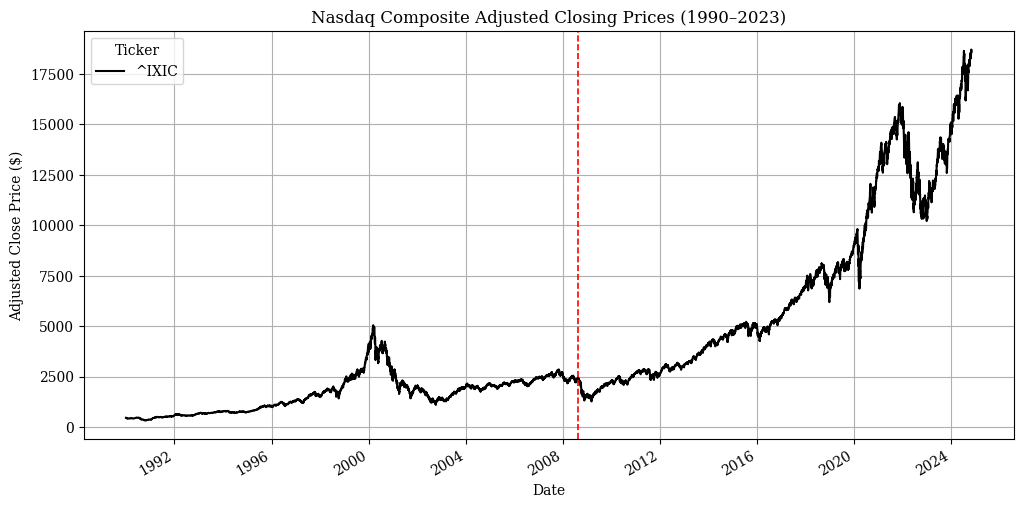

In [ ]:
NDQ_data['Adj Close'].plot(title = 'Nasdaq Composite Adjusted Closing Prices (1990–2023)', figsize = (12, 6), color = 'black')

plt.axvline(x = '2008-08-15', color = 'red', linestyle = '--', linewidth = 1.2) # example line, 2008 finanical crisis cascade

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.grid(True)

plt.savefig('NDQ_LB.png', dpi = 300)

plt.show()

In [ ]:
## files.download('NDQ_LB.png') ##

In [ ]:
NDQ_data_index_as_str = NDQ_data.index.astype('str') # fixing some error that arose when comparing original index (DateTime) to string values in below code cell
NDQ_data_copy = NDQ_data.copy()
NDQ_data_copy.index = NDQ_data_index_as_str
NDQ_data_copy

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,,
1990-01-02,459.299988,459.299988,459.299988,452.700012,452.899994,110720000
1990-01-03,460.899994,460.899994,461.600006,460.000000,461.100006,152660000
1990-01-04,459.399994,459.399994,460.799988,456.899994,460.399994,147950000
1990-01-05,458.200012,458.200012,459.399994,457.799988,457.899994,137230000
1990-01-08,458.700012,458.700012,458.700012,456.500000,457.100006,115500000
...,...,...,...,...,...,...
2024-10-24,18415.490234,18415.490234,18435.369141,18305.419922,18384.160156,5761280000
2024-10-25,18518.609375,18518.609375,18690.009766,18487.060547,18512.580078,6100040000


In [ ]:
# calculating numbers for Lehman Brother (LB)
finding_LB_min = NDQ_data_copy[(NDQ_data_copy.index >= '2008-08-15 00:00:00+00:00') & (NDQ_data_copy.index < '2010-01-01 00:00:00+00:00')]
price_min_LB = round(finding_LB_min['Adj Close'].min().item(), 2)
date_min_LB = finding_LB_min['Adj Close'].idxmin().item()

date_min_to_string_LB = dt.datetime.strptime(date_min_LB, '%Y-%m-%d').strftime('%B-%d-%Y')

print(f'The NASDAQ reached a low of ${price_min_LB} on {date_min_to_string_LB}')

The NASDAQ reached a low of $1268.64 on March-09-2009


In [ ]:
start_date_LB = '2008-08-15'
end_date_LB = '2009-03-09'

start_or_old_price_LB = NDQ_data_copy.loc[start_date_LB, 'Adj Close']
end_or_new_price_LB = NDQ_data_copy.loc[end_date_LB, 'Adj Close']

pct_change_LB_start_end = (1 - (end_or_new_price_LB / start_or_old_price_LB)) # percentage change in market
pct_change_LB_start_end = round(pct_change_LB_start_end * 100, 2).item()

print(f'From {start_date_LB} to {end_date_LB}, the market lost {pct_change_LB_start_end}% of its value.')

From 2008-08-15 to 2009-03-09, the market lost 48.27% of its value.


In [ ]:
# calculating numbers for Dot-Com (DC)
finding_DC_min_max = NDQ_data_copy[(NDQ_data_copy.index >= '1999-01-01 00:00:00+00:00') & (NDQ_data_copy.index < '2004-01-01 00:00:00+00:00')]
price_min_DC = round(finding_DC_min_max['Adj Close'].min().item(), 2)
date_min_DC = finding_DC_min_max['Adj Close'].idxmin().item()
price_max_DC = round(finding_DC_min_max['Adj Close'].max().item(), 2)
date_max_DC = finding_DC_min_max['Adj Close'].idxmax().item()

date_min_to_string_DC = dt.datetime.strptime(date_min_DC, '%Y-%m-%d').strftime('%B-%d-%Y')
date_max_to_string_DC = dt.datetime.strptime(date_max_DC, '%Y-%m-%d').strftime('%B-%d-%Y')

print(f'The NASDAQ was at a high of ${price_max_DC} on {date_max_to_string_DC}')
print(f'The NASDAQ reached a low of ${price_min_DC} on {date_min_to_string_DC}')

The NASDAQ was at a high of $5048.62 on March-10-2000
The NASDAQ reached a low of $1114.11 on October-09-2002


In [ ]:
start_date_DC = '2000-03-10'
end_date_DC = '2002-10-09'

start_or_old_price_DC = NDQ_data_copy.loc[start_date_DC, 'Adj Close']
end_or_new_price_DC = NDQ_data_copy.loc[end_date_DC, 'Adj Close']

pct_change_DC_start_end = (1 - (end_or_new_price_DC / start_or_old_price_DC)) # percentage change in market
pct_change_DC_start_end = round(pct_change_DC_start_end * 100, 2).item()

print(f'From {start_date_DC} to {end_date_DC}, the market lost {pct_change_DC_start_end}% of its value.')

From 2000-03-10 to 2002-10-09, the market lost 77.93% of its value.


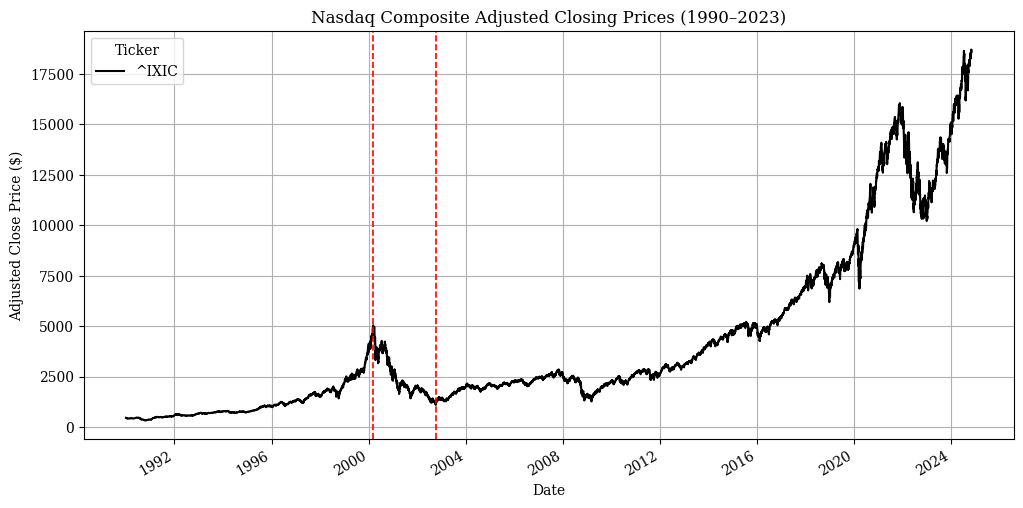

In [ ]:
NDQ_data['Adj Close'].plot(title = 'Nasdaq Composite Adjusted Closing Prices (1990–2023)', figsize = (12, 6), color = 'black')

plt.axvline(x = '2000-03-10', color = 'red', linestyle = '--', linewidth = 1.2) # Dot-Com bubble peak
plt.axvline(x = '2002-10-09', color = 'red', linestyle = '--', linewidth = 1.2) # Dot-Com bubble low

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.grid(True)

plt.savefig('NDQ_DC.png', dpi = 300)

plt.show()

In [ ]:
## files.download('NDQ_DC.png') ##

[*********************100%***********************]  3 of 3 completed


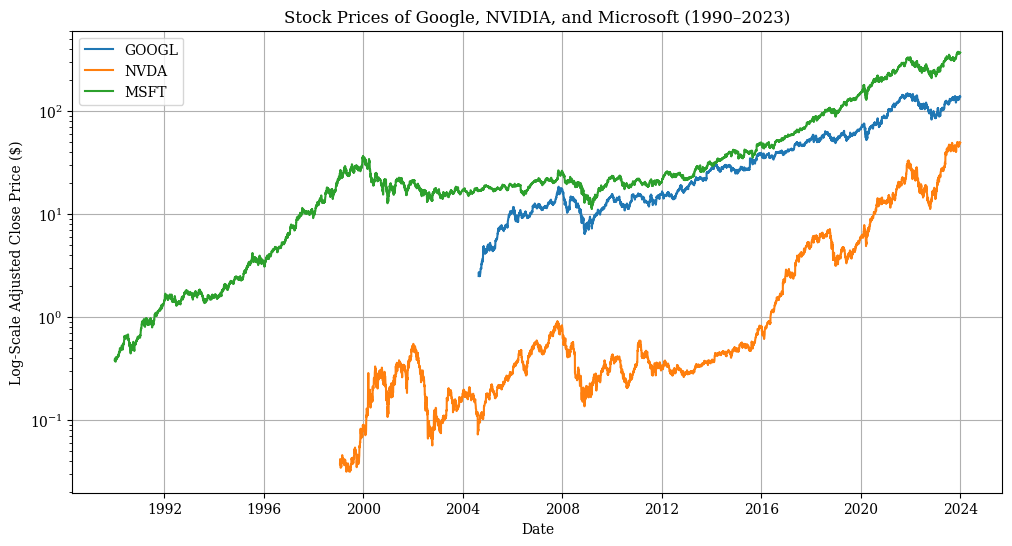

In [ ]:
# for loop written with help from https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
tickers = ['GOOGL', 'NVDA', 'MSFT']
start_date = '1990-01-01'
end_date = '2023-12-31'

data = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

plt.figure(figsize = (12, 6))

for ticker in tickers: # for loop that iterates through tickers to plot all three
    plt.plot(data[ticker], label = ticker)

plt.title('Stock Prices of Google, NVIDIA, and Microsoft (1990–2023)')
plt.xlabel('Date')
plt.ylabel('Log-Scale Adjusted Close Price ($)')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.savefig('stock_prices.png', dpi = 300)

plt.show()


In [ ]:
## files.download('stock_prices.png') ##

In [ ]:
print(NDQ_data.dtypes) # handling error with mpf.finance that states all the values in 'Open' are not float
for val in NDQ_data['Open']:
  if type(val) != float:
    print(val),
  if type(val) == int:
    print(val)

print(NDQ_data['Open'].isna().sum()) # checking for missing values

print(type(NDQ_data['Open']))
print(type(NDQ_data['Close']))

## explanation of issue: when using yfinance, it was returning a multiIndex DataFrame, causing the issues with mpl.finance \ didn't end up using mpl.finance, but was able to fix the issue that arose which is displayed below ##

Price      Ticker
Adj Close  ^IXIC     float64
Close      ^IXIC     float64
High       ^IXIC     float64
Low        ^IXIC     float64
Open       ^IXIC     float64
Volume     ^IXIC       int64
dtype: object
^IXIC
Ticker
^IXIC    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
NDQ_data_drop_ticker = NDQ_data.copy() # troubleshooting issue with new DF
NDQ_data_drop_ticker = NDQ_data_drop_ticker.droplevel(level = 'Ticker', axis = 1)

## NDQ_data_drop_ticker.head() ##

In [ ]:
NDQ_data_monthly = NDQ_data_drop_ticker.reset_index() # creating a separate DF and a 'Month' column
NDQ_data_monthly['Month'] = NDQ_data_monthly['Date'].dt.to_period('M')
NDQ_data_monthly['Year'] = NDQ_data_monthly['Date'].dt.to_period('Y')
NDQ_data_monthly.shape

## NDQ_data_monthly.tail() ##

(8775, 9)

In [ ]:
# decided to go with a volume graph instead of a candlestick using mpl.finance, didn't end up using valume chart either, but left it in here anyway

monthly_volume = NDQ_data_monthly.groupby('Month')['Volume'].sum()
monthly_volume = pd.DataFrame(monthly_volume)
monthly_volume.reset_index(inplace = True)

monthly_volume.shape # monthly has too many data points, try by year instead

(418, 2)

In [ ]:
yearly_volume = NDQ_data_monthly.groupby('Year')['Volume'].sum()
yearly_volume = pd.DataFrame(yearly_volume)
yearly_volume.reset_index(inplace = True)

print(yearly_volume.shape) # not bad

yearly_volume.tail()

(35, 2)


,Year,Volume
30,2020,1015285340000
31,2021,1291447450000
32,2022,1246076140000
33,2023,1242681400000
34,2024,1156444550000


In [ ]:
yearly_volume['VDiff'] = yearly_volume['Volume'].diff() # consecutive differences
yearly_volume.iloc[5:15] # check for positive and negative values

,Year,Volume,VDiff
5,1995,101166190000,2.680437e+10
6,1996,138168610000,3.700242e+10
7,1997,163782730000,2.561412e+10
8,1998,198244020000,3.446129e+10
9,1999,265886500000,6.764248e+10
10,2000,437123050000,1.712366e+11
11,2001,465069500000,2.794645e+10
12,2002,432112140000,-3.295736e+10
13,2003,415936280000,-1.617586e+10
14,2004,445908970000,2.997269e+10


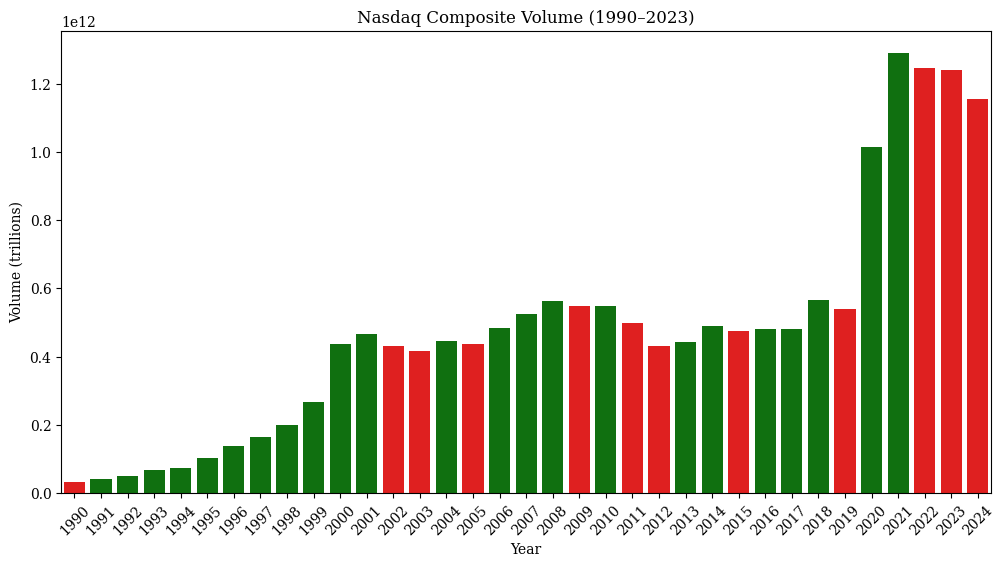

In [ ]:
vdiff_colours = ['green' if diff > 0 else 'red' for diff in yearly_volume['VDiff']] # list comp for colour scheme

plt.figure(figsize = (12, 6))

sns.barplot(data = yearly_volume, x = 'Year', y = 'Volume', hue = 'Year', legend = False, palette = vdiff_colours) # interesting error, when not defining hue to x ('year'), legend to false, and only relying on pallete =, figure would still generate but console would inform that the syntax is being updating to use the combination of the three in a later version
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Volume (trillions)')
plt.title('Nasdaq Composite Volume (1990–2023)')

plt.savefig('NDQ_volume.png', dpi = 300)

plt.show()

In [ ]:
## files.download('NDQ_volume.png') ##

**Working with data from S&P 500**

In [ ]:
SnP500_data = yf.download('^GSPC', start = '1990-01-01', end = '2024-10-31')

print("S&P 500 Data:")
SnP500_data.shape # check if = shape of NASDAQ

[*********************100%***********************]  1 of 1 completed

S&P 500 Data:


(8775, 6)

In [ ]:
SnP500_data.round(2) # to tick size mandated by SEC

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
1990-01-02,359.69,359.69,359.69,351.98,353.40,162070000
1990-01-03,358.76,358.76,360.59,357.89,359.69,192330000
1990-01-04,355.67,355.67,358.76,352.89,358.76,177000000
1990-01-05,352.20,352.20,355.67,351.35,355.67,158530000
1990-01-08,353.79,353.79,354.24,350.54,352.20,140110000
...,...,...,...,...,...,...
2024-10-24,5809.86,5809.86,5817.80,5784.92,5817.80,3543030000
2024-10-25,5808.12,5808.12,5862.82,5799.98,5826.75,3501280000


In [ ]:
SnPcount = (SnP500_data['Adj Close'] == SnP500_data['Close']).sum()
SnPcount

,0
Ticker,
^GSPC,8775


In [ ]:
SnP500_data_index_as_str = SnP500_data.index.astype('str') # fixing same random error as with NASDAQ
SnP500_data_copy = SnP500_data.copy()
SnP500_data_copy.index = SnP500_data_index_as_str
SnP500_data_copy

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
1990-01-02,359.690002,359.690002,359.690002,351.980011,353.399994,162070000
1990-01-03,358.760010,358.760010,360.589996,357.890015,359.690002,192330000
1990-01-04,355.670013,355.670013,358.760010,352.890015,358.760010,177000000
1990-01-05,352.200012,352.200012,355.670013,351.350006,355.670013,158530000
1990-01-08,353.790009,353.790009,354.239990,350.540009,352.200012,140110000
...,...,...,...,...,...,...
2024-10-24,5809.859863,5809.859863,5817.799805,5784.919922,5817.799805,3543030000
2024-10-25,5808.120117,5808.120117,5862.819824,5799.979980,5826.750000,3501280000


In [ ]:
# calculating numbers for Dot-Com (DC)
finding_DC_min_max_SnP500 = SnP500_data_copy[(SnP500_data_copy.index >= '1999-01-01 00:00:00+00:00') & (SnP500_data_copy.index < '2004-01-01 00:00:00+00:00')]
price_min_DC_SnP500 = round(finding_DC_min_max_SnP500['Adj Close'].min().item(), 2)
date_min_DC_SnP500 = finding_DC_min_max_SnP500['Adj Close'].idxmin().item()
price_max_DC_SnP500 = round(finding_DC_min_max_SnP500['Adj Close'].max().item(), 2)
date_max_DC_SnP500 = finding_DC_min_max_SnP500['Adj Close'].idxmax().item()

date_min_to_string_DC_SnP500 = dt.datetime.strptime(date_min_DC_SnP500, '%Y-%m-%d').strftime('%B-%d-%Y')
date_max_to_string_DC_SnP500 = dt.datetime.strptime(date_max_DC_SnP500, '%Y-%m-%d').strftime('%B-%d-%Y')

print(f'The NASDAQ was at a high of ${price_max_DC_SnP500} on {date_max_to_string_DC_SnP500}')
print(f'The NASDAQ reached a low of ${price_min_DC_SnP500} on {date_min_to_string_DC_SnP500}')

The NASDAQ was at a high of $1527.46 on March-24-2000
The NASDAQ reached a low of $776.76 on October-09-2002


In [ ]:
start_date_DC_SnP500 = '2000-03-10'
end_date_DC_SnP500 = '2002-10-09'

start_or_old_price_DC_SnP500 = SnP500_data_copy.loc[start_date_DC_SnP500, 'Adj Close']
end_or_new_price_DC_SnP500 = SnP500_data_copy.loc[end_date_DC_SnP500, 'Adj Close']

pct_change_DC_start_end_SnP500 = (1 - (end_or_new_price_DC_SnP500 / start_or_old_price_DC_SnP500)) # percentage change in market
pct_change_DC_start_end_SnP500 = round(pct_change_DC_start_end_SnP500 * 100, 2).item()

print(f'From {start_date_DC_SnP500} to {end_date_DC_SnP500}, the market lost {pct_change_DC_start_end_SnP500}% of its value.')

From 2000-03-10 to 2002-10-09, the market lost 44.32% of its value.


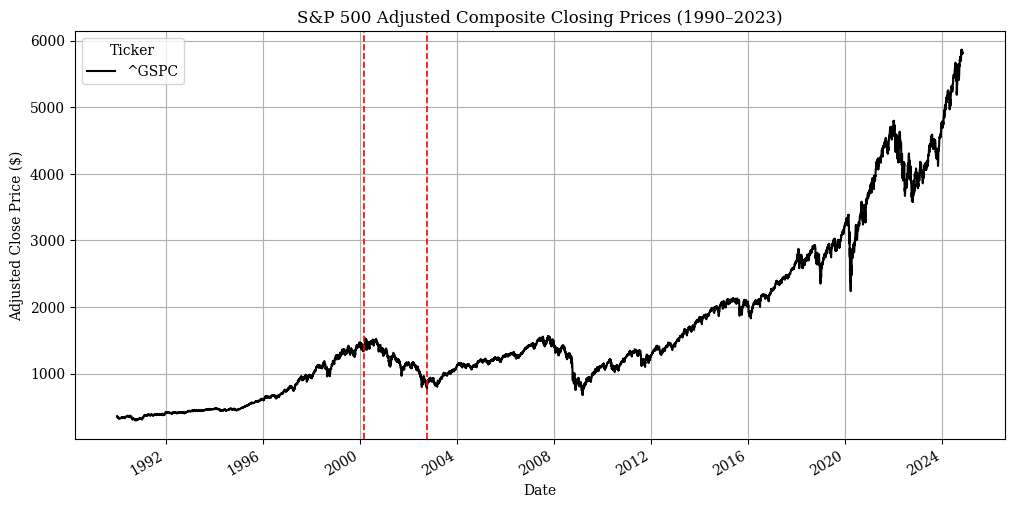

In [ ]:
SnP500_data['Adj Close'].plot(title = 'S&P 500 Adjusted Composite Closing Prices (1990–2023)', figsize = (12, 6), color = 'black')

plt.axvline(x = '2000-03-10', color = 'red', linestyle = '--', linewidth = 1.2) # Dot-Com bubble peak
plt.axvline(x = '2002-10-09', color = 'red', linestyle = '--', linewidth = 1.2) # Dot-Com bubble low
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.grid(True)

plt.savefig('SnP500_DC.png', dpi = 300)

plt.show()

In [ ]:
## files.download('SnP500_DC.png') ##